### Data Cleaning

In [103]:
###### Load the dataset
import pandas as pd
airbnb_raw = pd.read_csv('listings.csv')

###### See all the columns and setermine which are relevant
#list(airbnb_raw.columns.values)

###### Create a new dataframe with variables we care about
listing_raw = airbnb_raw[['id','price','host_since','host_response_time','host_response_rate','host_is_superhost',
                           'host_identity_verified','host_listings_count',
                          'zipcode','neighbourhood','latitude','longitude','property_type','room_type','accommodates',
                          'bathrooms','bedrooms','beds','bed_type','amenities','square_feet','security_deposit',
                          'cleaning_fee','minimum_nights','maximum_nights','instant_bookable','cancellation_policy',
                          'number_of_reviews','review_scores_rating']]

###### Create a copy of the dataframe to work on
listing = listing_raw.copy()


In [104]:
###### Data cleaning -- Change data type
listing['price'] = listing['price'].str.replace('$','')
listing['price'] = listing['price'].str.replace(',','')
listing['price'] = pd.to_numeric(listing['price'])

listing['security_deposit'] = listing['security_deposit'].str.replace('$','')
listing['security_deposit'] = listing['security_deposit'].str.replace(',','')
listing['security_deposit'] = pd.to_numeric(listing['security_deposit'])

listing['cleaning_fee'] = listing['cleaning_fee'].str.replace('$','')
listing['cleaning_fee'] = listing['cleaning_fee'].str.replace(',','')
listing['cleaning_fee'] = pd.to_numeric(listing['cleaning_fee'])

listing['zipcode'] = listing['zipcode'].str.replace(r'-\d+', '')

#listing = listing[str(listing['zipcode']).map(len) == 5]


In [105]:
###### Data cleaning -- Drop data that doesn't make sense
listing = listing[listing['price'] != 0.00]
listing = listing[listing['accommodates'] != 0]
listing = listing[listing['bedrooms'] != 0]
listing = listing[listing['beds'] != 0]
listing = listing.dropna(how='any', subset=['neighbourhood','zipcode','accommodates','property_type','bedrooms'])

#reindex
listing = listing.reset_index(drop=True)

In [106]:
###### Data cleaning -- Deal with missing data
import dateutil
#host_since: convert starting date to years of hosting and fill NAN with mean
listing['host_since'].fillna('2019-01-01',inplace = True)
listing['host_since'] = [dateutil.parser.parse(str(listing['host_since'].values[i])).year 
              for i in range(listing.shape[0])]
listing['host_since'] = [2019 - listing['host_since'][i] for i in range(listing.shape[0])]
listing['host_since'][listing['host_since']==0] = listing['host_since'].mean()

listing['host_response_time'].fillna('no information',inplace = True)

listing['host_response_rate'] = pd.to_numeric(listing['host_response_rate'].str.replace('%',''))
listing['host_response_rate'].fillna(listing['host_response_rate'].mean(),inplace = True)

listing['host_is_superhost'].fillna('no information',inplace = True)
listing['host_identity_verified'].fillna('f',inplace = True)
listing['host_listings_count'].fillna(1,inplace = True)
listing['beds'].fillna(1,inplace = True)
listing['bathrooms'].fillna(1,inplace = True)
#amenities: convert list of amenities to amount of amenities
listing['amenities'] = [len(listing['amenities'][i].split(',')) for i in range(listing.shape[0])]

listing['square_feet'].fillna(listing['square_feet'].mean(),inplace = True)
listing['security_deposit'].fillna(0,inplace = True)
listing['cleaning_fee'].fillna(0,inplace = True)
listing['review_scores_rating'].fillna(listing['review_scores_rating'].mean(),inplace = True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
listing.shape

(27620, 29)

In [108]:
###### Check whether NAN still exists
listing.isnull().any()


id                        False
price                     False
host_since                False
host_response_time        False
host_response_rate        False
host_is_superhost         False
host_identity_verified    False
host_listings_count       False
zipcode                   False
neighbourhood             False
latitude                  False
longitude                 False
property_type             False
room_type                 False
accommodates              False
bathrooms                 False
bedrooms                  False
beds                      False
bed_type                  False
amenities                 False
square_feet               False
security_deposit          False
cleaning_fee              False
minimum_nights            False
maximum_nights            False
instant_bookable          False
cancellation_policy       False
number_of_reviews         False
review_scores_rating      False
dtype: bool

In [109]:
###### Change neighbourhood to larger neighbourhoods
neighbourhood = pd.read_csv('neighbourhoods.csv')
listing['neighbourhood'].fillna('no information',inplace = True)
from collections import defaultdict

neighbourbood_dict = defaultdict(list)
for k, v in zip(neighbourhood['neighbourhood'], neighbourhood['neighbourhood_group']):
     neighbourbood_dict[k].append(v)
        
def convert_neighbourhoods(val):
     return neighbourbood_dict[val]
    
listing['neighbourhood'] = listing['neighbourhood'].apply(convert_neighbourhoods)
listing['neighbourhood'] = [''.join(listing['neighbourhood'][i]) for i in range(listing.shape[0])]


In [110]:
import numpy as np
np.unique(listing[listing['neighbourhood'] == '']['zipcode'])
zip_manhattan = ['10001', '10002', '10003', '10004',
       '10005', '10006', '10007', '10009', '10010', '10011', '10012',
       '10013', '10014', '10016', '10017', '10018', '10019', '10021',
       '10022', '10023', '10024', '10025', '10026', '10027', '10028',
       '10029', '10030', '10031', '10032', '10033', '10034', '10035',
       '10036', '10037', '10038', '10039', '10040', '10044', '10065',
       '10069', '10075', '10128', '10162', '10174', '10280', '10281']
zip_staten = ['10301', '10302', '10304', '10305', '10306', '10310', '10312','10314']
zip_bronx = ['10451', '10452', '10453', '10454', '10455', '10456',
       '10457', '10458', '10459', '10460', '10461', '10462', '10463',
       '10464', '10465', '10466', '10467', '10468', '10469', '10471',
       '10472', '10473']
zip_queens = ['11001', '11101', '11102','11103', '11104', '11105', '11106',
              '11354', '11355', '11356', '11358', '11361',
       '11362', '11364', '11365', '11366', '11367', '11370', '11372',
       '11373', '11374', '11375', '11377', '11378', '11379', '11385',
              '11411', '11412', '11414', '11418', '11422', '11426', '11432',
       '11434', '11435', '11436','11621', '11691', '11692',
       '11693', '11694']
zip_brooklyn = ['11201', '11203', '11205',
       '11206', '11207', '11209', '11210', '11211', '11212', '11213',
       '11215', '11216', '11217', '11218', '11219', '11220', '11221',
       '11222', '11223', '11225', '11226', '11229', '11230', '11231',
       '11232', '11233', '11234', '11235', '11236', '11237', '11238',
       '11239', '11249']
zip_other = ['10550', '10704','11559']


In [111]:
for i in listing[listing['neighbourhood'] == ''].index:
    if listing['zipcode'][i] in zip_bronx:
        listing['neighbourhood'][i] ='Bronx'
    if listing['zipcode'][i] in zip_brooklyn:
        listing['neighbourhood'][i]='Brooklyn'
    if listing['zipcode'][i] in zip_manhattan:
        listing['neighbourhood'][i]='Manhattan'
    if listing['zipcode'][i] in zip_queens:
        listing['neighbourhood'][i]='Queens'
    if listing['zipcode'][i] in zip_staten:
        listing['neighbourhood'][i]='Staten Island'

listing = listing[listing['neighbourhood']!='']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [112]:
listing.to_csv('out.csv') #for Tableau mapping

### Exploratory Visualizations

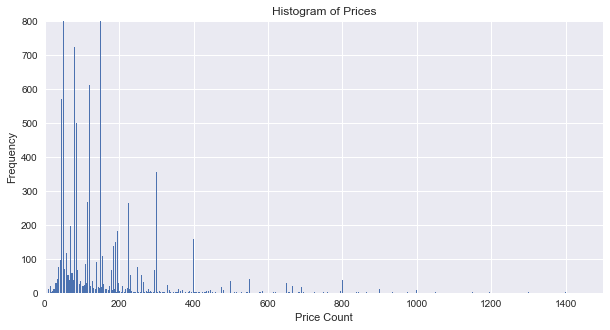

In [171]:
###### Distribution of Prices
# listing = pd.read_csv('out.csv')
# listing = listing.iloc[:,1:]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(10,5)})

#visualization of price
price_count = [len(listing[listing['price'] == np.unique(listing['price'])[i]]) 
               for i in range(len(np.unique(listing['price'])))]
plt.bar(np.unique(listing['price']),price_count)
plt.title("Histogram of Prices")
plt.xlabel("Price Count")
plt.ylabel("Frequency")
plt.axis([0, 1500, 0, 800])
plt.show()


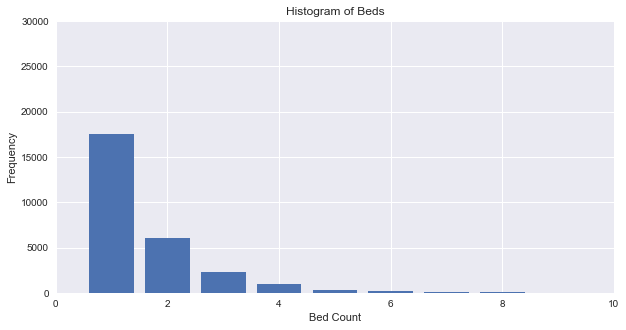

In [172]:
###### Distribution of beds
bed_count = [len(listing[listing['beds'] == np.unique(listing['beds'])[i]]) 
             for i in range(len(np.unique(listing['beds'])))]
plt.bar(np.unique(listing['beds']),bed_count)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.axis([0,10,0,30000])
plt.show()


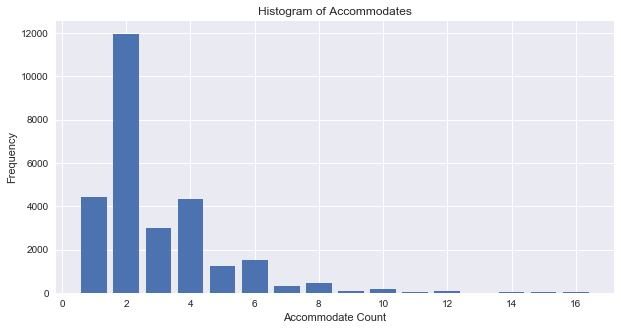

In [173]:
###### Distribution of Accommodates
accommodate_count = [len(listing[listing['accommodates'] == np.unique(listing['accommodates'])[i]]) 
                     for i in range(len(np.unique(listing['accommodates'])))]
plt.bar(np.unique(listing['accommodates']),accommodate_count)
plt.title("Histogram of Accommodates")
plt.xlabel("Accommodate Count")
plt.ylabel("Frequency")
plt.show()


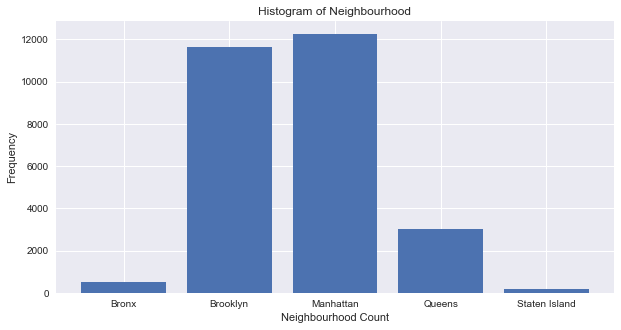

In [174]:
###### Distrinution of listings in different neighbourhood
neighbourhood_count = [len(listing[listing['neighbourhood'] == np.unique(listing['neighbourhood'])[i]]) 
                       for i in range(len(np.unique(listing['neighbourhood'])))]
plt.bar(np.unique(listing['neighbourhood']),neighbourhood_count)
plt.title("Histogram of Neighbourhood")
plt.xlabel("Neighbourhood Count")
plt.ylabel("Frequency")
plt.show()


Bronx
78.60271317829458
Brooklyn
125.75676837129352
Manhattan
201.16064289793587
Queens
96.84470820969338
Staten Island
110.8


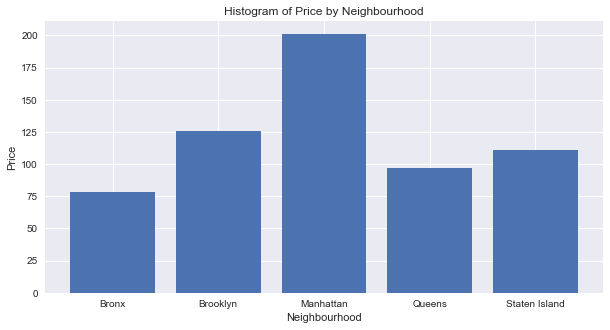

In [175]:
###### Distribution of price by neighbourhood
group_by_neighbourhood = listing.groupby(listing['neighbourhood'])
for name, group in group_by_neighbourhood:
    print(name)
    print(group_by_neighbourhood.get_group(name)['price'].mean())

price_by_neighbourhood = [group_by_neighbourhood.get_group(name)['price'].mean() 
                          for name,group in group_by_neighbourhood]
neighbourhood_name = np.unique(listing['neighbourhood'])

plt.bar(neighbourhood_name,price_by_neighbourhood)
plt.title("Histogram of Price by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()

### Seasonal Trend

In [118]:
######seasonality
calendar = pd.read_csv('calendar.csv')

calendar['price'] = calendar['price'].str.replace('$','')
calendar['price'] = calendar['price'].str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])
calendar = calendar.dropna()

calendar['date']=pd.to_datetime(calendar['date'])
calendar['weekday'] = pd.Series(calendar.date).dt.dayofweek
calendar['month'] = pd.Series(calendar.date).dt.month
calendar['year'] = pd.Series(calendar.date).dt.year

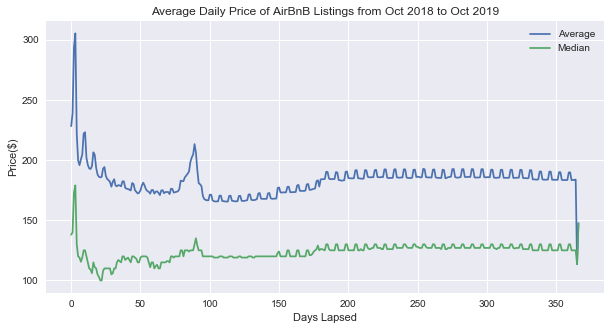

In [119]:
#Plot average daily price
date=[]
avg_price=[]
median_price=[]
import seaborn as sns
sns.set()
for i in sorted(calendar['date'].unique()):
    date.append(i)
    avg_price.append(calendar[calendar['date'] == i]['price'].mean())
    median_price.append(calendar[calendar['date'] == i]['price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Days Lapsed')
plt.title('Average Daily Price of AirBnB Listings from Oct 2018 to Oct 2019')
plt.legend()

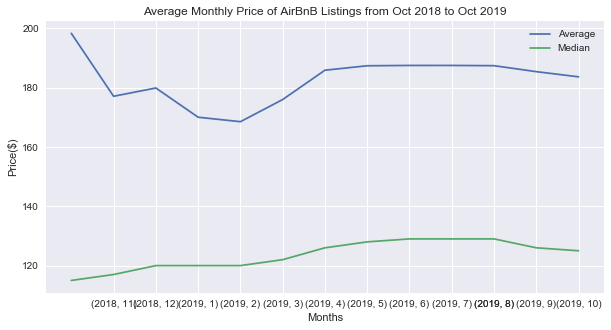

In [120]:
#Plot average monthly price
yearDF=calendar.groupby(['year','month']).price.mean()
yearDF_median= calendar.groupby(['year','month']).price.median()
yearDF.plot(xticks = [10,11,12,1,2,3,4,5,6,7,8,9,10],
            title = 'Average Monthly Price of AirBnB Listings from Oct 2018 to Oct 2019',
           label = 'Average')
yearDF_median.plot(label = 'Median')
plt.ylabel('Price($)')
plt.xlabel('Months')
plt.legend()

Text(0.5,1,'Average Price per Day of the Week')

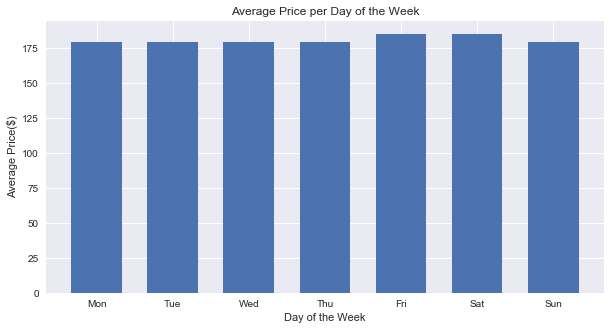

In [121]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(calendar[calendar['weekday'] == i]['price'].mean())
    daily_median_price.append(calendar[calendar['weekday'] == i]['price'].median())
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

### Preprocessing

#### Correlation - for determining relevant variables

In [342]:
#label encoding first to see the correlation matrix
corr_listing = listing.copy()
reponse_types = np.unique(corr_listing["host_response_time"])
corr_listing["host_response_time"] = corr_listing["host_response_time"].astype('category',categories = reponse_types)
corr_listing["host_response_time"] = corr_listing["host_response_time"].cat.codes

superhost_types = np.unique(corr_listing["host_is_superhost"])
corr_listing["host_is_superhost"] = corr_listing["host_is_superhost"].astype('category',categories = superhost_types)
corr_listing["host_is_superhost"] = corr_listing["host_is_superhost"].cat.codes

identity_types = np.unique(corr_listing["host_identity_verified"])
corr_listing["host_identity_verified"] = corr_listing["host_identity_verified"].astype('category',categories = identity_types)
corr_listing["host_identity_verified"] = corr_listing["host_identity_verified"].cat.codes

neighbourhood_types = np.unique(corr_listing['neighbourhood'])
corr_listing["neighbourhood"] = corr_listing["neighbourhood"].astype('category',categories = neighbourhood_types)
corr_listing["neighbourhood"] = corr_listing["neighbourhood"].cat.codes

property_types = np.unique(corr_listing['property_type'])
corr_listing["property_type"] = corr_listing["property_type"].astype('category',categories = property_types)
corr_listing["property_type"] = corr_listing["property_type"].cat.codes

room_types = np.unique(corr_listing['room_type'])
corr_listing["room_type"] = corr_listing["room_type"].astype('category',categories = room_types)
corr_listing["room_type"] = corr_listing["room_type"].cat.codes

bed_types = np.unique(corr_listing['bed_type'])
corr_listing["bed_type"] = corr_listing["bed_type"].astype('category',categories = bed_types)
corr_listing["bed_type"] = corr_listing["bed_type"].cat.codes

instant_types = np.unique(corr_listing['instant_bookable'])
corr_listing["instant_bookable"] = corr_listing["instant_bookable"].astype('category',categories = instant_types)
corr_listing["instant_bookable"] = corr_listing["instant_bookable"].cat.codes

policy_types = np.unique(corr_listing["cancellation_policy"])
corr_listing["cancellation_policy"] = corr_listing["cancellation_policy"].astype('category',categories = policy_types)
corr_listing["cancellation_policy"] = corr_listing["cancellation_policy"].cat.codes

corr_listing.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
/anaconda3/lib/python3

,id,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,host_listings_count,zipcode,neighbourhood,...,amenities,square_feet,security_deposit,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,number_of_reviews,review_scores_rating
0,2515,59.0,11.0,3,88.000000,2,1,3.0,10026,2,...,32,732.778325,0.0,60.0,2,21,0,4,174,93.0
1,2539,149.0,11.0,4,100.000000,2,1,8.0,11218,1,...,44,732.778325,100.0,25.0,1,730,0,2,9,98.0
2,15729,89.0,10.0,2,70.000000,0,1,3.0,11231,1,...,12,732.778325,300.0,60.0,1,730,0,4,22,79.0
3,3330,70.0,11.0,2,100.000000,0,1,5.0,11206,1,...,25,732.778325,150.0,125.0,5,730,0,4,36,98.0
4,16326,200.0,10.0,1,93.095375,2,1,2.0,11238,1,...,50,732.778325,500.0,140.0,28,365,0,4,140,99.0


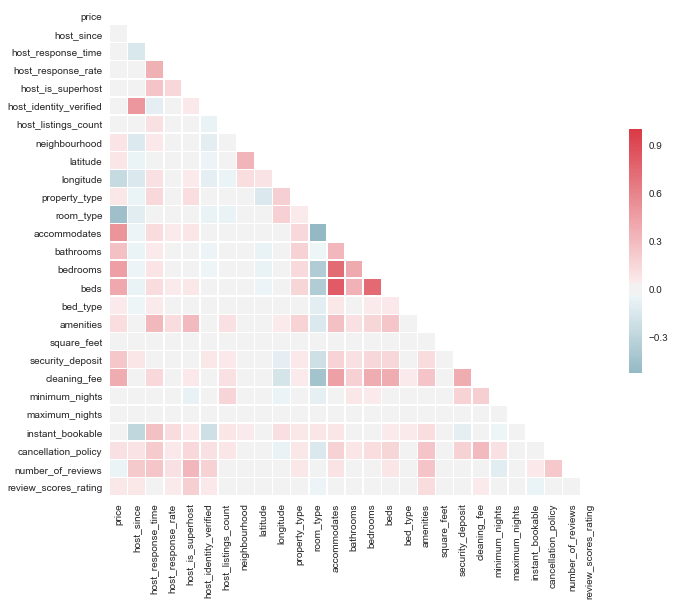

In [344]:
from string import ascii_letters

sns.set(style="white")

corr = corr_listing.iloc[:,1:].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [346]:
#list of variables relatively strongly correlate with price:
corr['price'][abs(corr['price'])>0.03]

#security_deposit,cleaning_fee: correlate with price but probably workds throught the opposite direction, higher price
#                               means higher security deposit/cleaning fee

#need to consider correlation between independent variables

price                   1.000000
host_listings_count     0.034980
neighbourhood           0.076153
latitude                0.064151
longitude              -0.256768
property_type           0.056863
room_type              -0.467766
accommodates            0.509830
bathrooms               0.267501
bedrooms                0.445387
beds                    0.407253
bed_type                0.043529
amenities               0.114286
security_deposit        0.231678
cleaning_fee            0.381605
cancellation_policy     0.090407
number_of_reviews      -0.053537
review_scores_rating    0.055487
Name: price, dtype: float64

#### DBSCAN - for detecting and removing outliers

In [178]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# price = listing['price'].to_frame()
# acco = listing['accommodates'].to_frame()
# norm = acco.merge(price,left_index = True,right_index = True)
listing = listing.reset_index(drop=True)
listing_db = listing[['price','host_listings_count','neighbourhood','property_type','room_type','accommodates',
                       'bathrooms','bed_type','bedrooms','beds','amenities','square_feet','minimum_nights','instant_bookable',
                       'cancellation_policy','number_of_reviews','review_scores_rating']].copy()
listing_db = pd.get_dummies(listing_db, columns=['neighbourhood',"property_type","room_type","bed_type",
                                                   "instant_bookable","cancellation_policy"])

db = DBSCAN(eps=30, min_samples=10).fit(listing_db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 11
Estimated number of noise points: 772


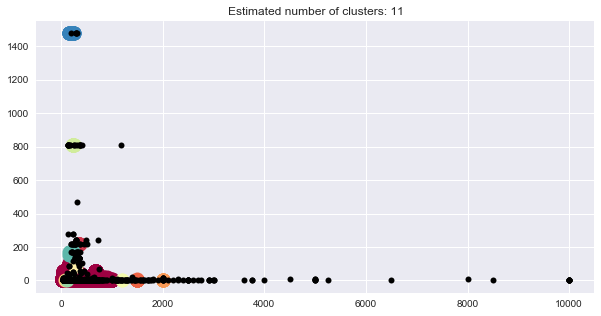

In [179]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = listing_db[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = listing_db[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [180]:
#remove noise
noise_id = []
for i in listing_db[db.labels_ == -1].index:
    noise_id.append(listing.loc[i,:]['id'])
    
for i in range(listing.shape[0]):
    if listing['id'][i] in noise_id:
        listing = listing[listing['id'] != listing['id'][i]]

In [181]:
listing.shape

(26844, 29)

### Modeling

In [311]:
#one hot encoding (creating dummies) for regression analysis
predictors = listing[['id','host_listings_count','neighbourhood','property_type','room_type','accommodates',
                       'bathrooms','bed_type','bedrooms','beds','amenities','square_feet','security_deposit',
                       'cleaning_fee','minimum_nights','instant_bookable',
                       'cancellation_policy','number_of_reviews','review_scores_rating']].copy()
outcome = listing[['id','price']].copy()
predictors = pd.get_dummies(predictors, columns=['neighbourhood',"property_type","room_type","bed_type",
                                                   "instant_bookable","cancellation_policy"])
#outcome_log = np.log(outcome)#.astype('int')



In [312]:
###### Split the data into training set and testing set
from sklearn.model_selection import train_test_split
listing_train, listing_test, price_train, price_test  = train_test_split(predictors.iloc[:,1:], outcome.iloc[:,1].astype('int'), test_size=0.3)


#### Linear Regression

Linear Regression (train): 33.98828944075775
Linear Regression (test): 34.01275425227418


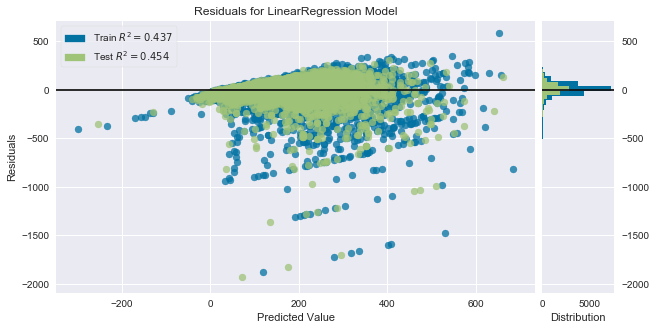

In [313]:
###### Regression
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot

linear_reg = linear_model.LinearRegression()
regression_fit = linear_reg.fit(listing_train, price_train)
linear_reg_error_train = metrics.median_absolute_error(price_train, linear_reg.predict(listing_train))
linear_reg_error_test = metrics.median_absolute_error(price_test, linear_reg.predict(listing_test))
print ("Linear Regression (train): " + str(linear_reg_error_train))
print ("Linear Regression (test): " + str(linear_reg_error_test))

visualizer = ResidualsPlot(linear_reg)
visualizer.fit(listing_train, price_train)
visualizer.score(listing_test, price_test)
visualizer.poof()

#### Decision Tree

In [314]:
###### Decision Tree model
from sklearn import tree
from sklearn.metrics import mean_squared_error
# listing_train = listing_train.astype('int')
# price_train = price_train.astype('int')
# listing_test = listing_train.astype('int')
# price_test = price_train.astype('int')
clf = tree.DecisionTreeRegressor(max_depth = 10)
clf = clf.fit(listing_train, price_train)

tree_error_train=metrics.median_absolute_error(price_train, clf.predict(listing_train))
tree_error_test=metrics.median_absolute_error(price_test, clf.predict(listing_test))
print("Decision Tree (train):", tree_error_train)
print("Decision Tree (test):", tree_error_test)


Decision Tree (train): 25.0
Decision Tree (test): 27.254248907564687


#### Random Forest

In [315]:
###### Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 50)
rf = rf.fit(listing_train, price_train)

forest_error_train=metrics.median_absolute_error(price_train, rf.predict(listing_train))
forest_error_test=metrics.median_absolute_error(price_test, rf.predict(listing_test))
print("Random Forest (train):", forest_error_train)
print("Random Forest (test):", forest_error_test)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest (train): 9.799999999999997
Random Forest (test): 27.400000000000006


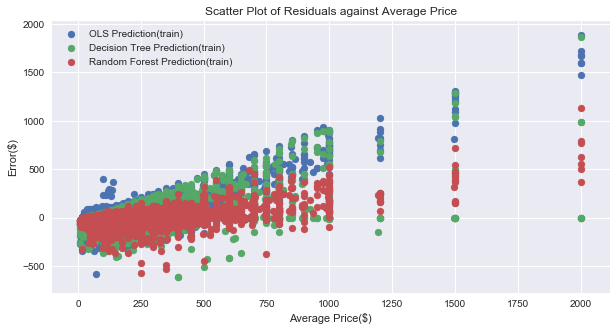

In [334]:
x = [i for i in range(listing_train.shape[0])]
y_ols_train = linear_reg.predict(listing_train)
y_dt_train = clf.predict(listing_train)
y_rf_train = rf.predict(listing_train)
error_ols_train = price_train - y_ols_train
error_dt_train = price_train - y_dt_train
error_rf_train = price_train - y_rf_train

plt.scatter(price_train, error_ols_train, label = 'OLS Prediction(train)')
plt.scatter(price_train, error_dt_train, label = 'Decision Tree Prediction(train)')
plt.scatter(price_train, error_rf_train, label = 'Random Forest Prediction(train)')
plt.ylabel('Error($)')
plt.xlabel('Average Price($)')
plt.title('Scatter Plot of Residuals against Average Price')
plt.legend()

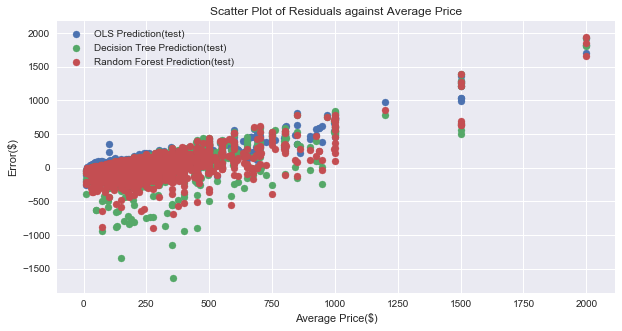

In [333]:
x = [i for i in range(listing_test.shape[0])]
y_ols_test = linear_reg.predict(listing_test)
y_dt_test = clf.predict(listing_test)
y_rf_test = rf.predict(listing_test)
error_ols_test = price_test - y_ols_test
error_dt_test = price_test - y_dt_test
error_rf_test = price_test - y_rf_test
plt.scatter(price_test, error_ols_test, label = 'OLS Prediction(test)')
plt.scatter(price_test, error_dt_test, label = 'Decision Tree Prediction(test)')
plt.scatter(price_test, error_rf_test, label = 'Random Forest Prediction(test)')
plt.ylabel('Error($)')
plt.xlabel('Average Price($)')
plt.title('Scatter Plot of Residuals against Average Price')
plt.legend()

In [335]:
print('Ordinary Least Squares')
print ("OLS(train): " + str(linear_reg_error_train))
print ("OLS(test): " + str(linear_reg_error_test))
print(5*'-')
print('Decision Tree')
print("Decision Tree (train):", tree_error_train)
print("Decision Tree (test):", tree_error_test)
print(5*'-')
print('Random Forest')
print("Random Forest (train):", forest_error_train)
print("Random Forest (test):", forest_error_test)

Ordinary Least Squares
OLS(train): 33.98828944075775
OLS(test): 34.01275425227418
-----
Decision Tree
Decision Tree (train): 25.0
Decision Tree (test): 27.254248907564687
-----
Random Forest
Random Forest (train): 9.799999999999997
Random Forest (test): 27.400000000000006


### Take Seasonality into Account

In [191]:
###A multiplier for each weekday
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

pricing_data=dict.fromkeys(b)
for i in pricing_data:
    pricing_data[i]=[]
    

In [192]:
listing_id=[]
for i in listing['id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(calendar[(calendar['weekday'] == index) & (calendar['listing_id'] == i)]['price'].mean())


In [193]:
results = pd.DataFrame(pricing_data)
results['id'] = listing_id
results_nona = results.dropna(axis = 0)
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'id']]
results_nona.to_csv("seasonality_tomodel.csv")


In [208]:
results_nona = pd.read_csv('seasonality_tomodel.csv')
results_multiplier = results_nona.iloc[:,1:]
for i in b[1:7]:
    results_multiplier[i] = results_multiplier[i]/results_multiplier['Mon']
results_multiplier['Mon']= 1
results_multiplier.head(5)


,Mon,Tue,Wed,Thu,Fri,Sat,Sun,id
0,1,1.006040,1.006948,1.008894,1.013063,1.007782,1.006312,2515
1,1,1.000000,1.018870,1.019736,1.025765,1.025765,0.994082,2539
2,1,1.000000,1.000000,1.000000,1.573034,1.573034,1.000000,15729
3,1,1.007143,1.000000,1.000000,1.000000,1.000000,1.000000,3330
4,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16326


In [209]:
multiplier = dict.fromkeys(b)
for index,i in enumerate(multiplier):
    multiplier[i]=results_multiplier.mean()[i]
multiplier


{'Mon': 1.0,
 'Tue': 0.9982253432528384,
 'Wed': 0.9984382447085507,
 'Thu': 0.9990142399181018,
 'Fri': 1.032245759171739,
 'Sat': 1.0344195258935651,
 'Sun': 1.0016904779547875}

#### OLS Linear Regression

In [259]:
sample = results_nona.iloc[:,1:]
sample_variables=predictors.loc[predictors['id'].isin(sample['id'])]
sample = sample.loc[sample['id'].isin(sample_variables['id'])]
sample_variables=sample_variables.loc[sample_variables['id'].isin(sample['id'])]
sample_outcome =outcome.loc[outcome['id'].isin(sample_variables['id'])]
listing_train, listing_test, price_train, price_test  = train_test_split(sample_variables, 
                                                                         sample_outcome, 
                                                                         test_size=0.3)

new_predictions_train = sample.loc[sample['id'].isin(listing_train['id'])]
new_predictions_test = sample.loc[sample['id'].isin(listing_test['id'])]
sample_outcome_train = sample.loc[sample['id'].isin(listing_train['id'])]
sample_outcome_test = sample.loc[sample['id'].isin(listing_test['id'])]

new_predictions_train.loc[:,0:7]=0
new_predictions_test.loc[:,0:7]=0


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

Linear Regression (train): 71.86255395139138
Linear Regression (test): 67.92803575470674


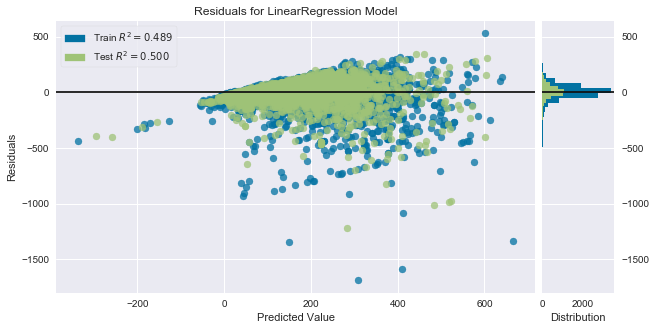

In [260]:
linear_reg = linear_model.LinearRegression()
regression_fit = linear_reg.fit(listing_train.iloc[:,1:], price_train.iloc[:,1].astype('int'))

new_predictions_train['Mon']=linear_reg.predict(listing_train.iloc[:,1:])
new_predictions_test['Mon']=linear_reg.predict(listing_test.iloc[:,1:])

for i in b[1:]:
    new_predictions_train[i] = linear_reg.predict(listing_train.iloc[:,1:])*multiplier[i]
    new_predictions_test[i] = linear_reg.predict(listing_test.iloc[:,1:])*multiplier[i]
linear_reg_error_train = metrics.median_absolute_error(sample_outcome_train.values.flatten(), new_predictions_train.values.flatten())
linear_reg_error_test = metrics.median_absolute_error(sample_outcome_test.values.flatten(), new_predictions_test.values.flatten())
print ("Linear Regression (train): " + str(linear_reg_error_train))
print ("Linear Regression (test): " + str(linear_reg_error_test))
#new_predict_train
visualizer = ResidualsPlot(linear_reg)
visualizer.fit(listing_train.iloc[:,1:], price_train.iloc[:,1])
visualizer.score(listing_test.iloc[:,1:], price_test.iloc[:,1])
visualizer.poof()

#### Decision Tree

In [261]:
clf = tree.DecisionTreeRegressor(max_depth = 10)
clf = clf.fit(listing_train.iloc[:,1:], price_train.iloc[:,1].astype('int'))

new_predictions_train['Mon']=clf.predict(listing_train.iloc[:,1:])
new_predictions_test['Mon']=clf.predict(listing_test.iloc[:,1:])

for i in b[1:]:
    new_predictions_train[i] = clf.predict(listing_train.iloc[:,1:])*multiplier[i]
    new_predictions_test[i] = clf.predict(listing_test.iloc[:,1:])*multiplier[i]
tree_error_train = metrics.median_absolute_error(sample_outcome_train.values.flatten(), new_predictions_train.values.flatten())
tree_error_test = metrics.median_absolute_error(sample_outcome_test.values.flatten(), new_predictions_test.values.flatten())
print("Decision Tree (train):", tree_error_train)
print("Decision Tree (test):", tree_error_test)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

Decision Tree (train): 60.70415356751309
Decision Tree (test): 58.94940107637346


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


#### Random Forest

In [263]:
rf = RandomForestRegressor(max_depth = 50)
rf = rf.fit(listing_train.iloc[:,1:], price_train.iloc[:,1].astype('int'))

new_predictions_train['Mon']=rf.predict(listing_train.iloc[:,1:])
new_predictions_test['Mon']=rf.predict(listing_test.iloc[:,1:])

for i in b[1:]:
    new_predictions_train[i] = rf.predict(listing_train.iloc[:,1:])*multiplier[i]
    new_predictions_test[i] = rf.predict(listing_test.iloc[:,1:])*multiplier[i]
forest_error_train = metrics.median_absolute_error(sample_outcome_train.values.flatten(), new_predictions_train.values.flatten())
forest_error_test = metrics.median_absolute_error(sample_outcome_test.values.flatten(), new_predictions_test.values.flatten())

print("Random Forest (train):", forest_error_train)
print("Random Forest (test):", forest_error_test)


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher

Random Forest (train): 62.75918152821175
Random Forest (test): 61.88386849951431


In [264]:
print('Ordinary Least Squares')
print ("OLS(train): " + str(linear_reg_error_train))
print ("OLS(test): " + str(linear_reg_error_test))
print(5*'-')
print('Decision Tree')
print("Decision Tree (train):", tree_error_train)
print("Decision Tree (test):", tree_error_test)
print(5*'-')
print('Random Forest')
print("Random Forest (train):", forest_error_train)
print("Random Forest (test):", forest_error_test)

Ordinary Least Squares
OLS(train): 71.86255395139138
OLS(test): 67.92803575470674
-----
Decision Tree
Decision Tree (train): 60.70415356751309
Decision Tree (test): 58.94940107637346
-----
Random Forest
Random Forest (train): 62.75918152821175
Random Forest (test): 61.88386849951431
